### Teste para verificar se sua amostra é Gaussiana

#### Execute o teste de Shapiro-Wilk para verificar se um conjunto de dados é ou não de distribuição normal (Gaussina)

O teste de Shapiro-Wilk testa a hipótese nula de que os dados foram extraídos de uma distribuição normal.

##### H0: a amostra tem distribuição gaussiana.
##### H1: a amostra não possui distribuição gaussiana.

In [10]:


from scipy.stats import shapiro
import numpy as np



data = np.random.normal(size=100)
stat, p = shapiro(data)

print('A estatística de teste -> stat=%.3f, valor p -> p=%.3f' % (stat,p))

# Este algoritmo utiliza um nível de confiança igual a 95%, logo alpha = 0,05

if p > 0.05: # Comparando o valor de p com alpha.
    
    print('Provavelmente Gaussiana, há indícios para aceitar Ho.')
else:
    print('Provavelmente não Gaussiana, há indícios para rejeitar Ho.')

A estatística de teste -> stat=0.982, valor p -> p=0.206
Provavelmente Gaussiana, há indícios para aceitar Ho.


    * Estatística de teste: é uma estatística amostral ou um valor baseado nos dados amostrais. Utiliza-se uma estatística de teste para tomar uma decisão sobre a rejeição ou não da hipótese nula. 

    * Valor p:  O valor 'p' quantifica o erro cometido ao rejeitar a hipótese nula. Um valor 'p' muito pequeno sugere que os resultados amostrais são muito improváveis sob a hipótese nula, ou seja, constitui evidência contra a hipótese nula.  
    
> Critérios de decisão para o valor p:

 <b>Rejeitar a hipótese nula Ho:</b>  se o valor 'p' é no máximo igual ao nível de significância.
 
<b>Não Rejeitar a hipótese nula Ho:</b> se o valor 'p' é maior do que o nível de significância.

#### Verificação Gráfica

In [6]:
import seaborn as sns

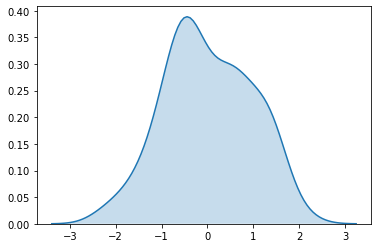

In [12]:
sns.kdeplot(data, shade=True);

### Teste para verificar se suas amostras  são pareadas ou independentes

> Uma amostra pareada corresponde ao levantamento de dados da mesma amostra em duas situações nas quais tenha interferido algum fator cujo efeito deseja-se avaliar. Por exemplo medir o nível de insulina antes e depois de aplicar uma medicação. 

> Já amostras independentes trata-se de de duas amostras de distintas populações. Por exemplo comparar o rendimento acadêmico de duas turmas distintas que possuem métodos de ensino distintos, ou duas turmas distintas que cursaram ou não determinado curso. Em caso de amostras independentes é preciso ainda realizar um teste antes de tudo, para verificar se são Homocedásticas(possuem variâncias iguais) ou Heterocedásticas (possuem variâncias diferentes). Pois isso afetará a apuração do grau de liberdade e do Intervalo de Confiança.


<b> H0: São independentes.</b>


<b> H1: São pareadas.<b>

##### Teste de Correlação de Classificação de Spearman: Testa se duas amostras tem relação monotônica 

Calcula um coeficiente de correlação de Spearman com o valor p associado.

O coeficiente de correlação de ordem de classificação de Spearman é uma medida não paramétrica da monotonicidade da relação entre dois conjuntos de dados. Ao contrário da correlação de Pearson, a correlação de Spearman não assume que ambos os conjuntos de dados são normalmente distribuídos. Como outros coeficientes de correlação, este varia entre -1 e +1, com 0 implicando em nenhuma correlação. Correlações de -1 ou +1 implicam em uma relação monotônica exata. Correlações positivas implicam que à medida que x aumenta, y também aumenta. Correlações negativas implicam que à medida que x aumenta, y diminui.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html

In [54]:
from scipy.stats import spearmanr

data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]

rho,p = spearmanr(data1,data2)

print('p=%.3f' % (p))
print('Coeficiente de correlação: ',rho)

# Este algoritmo utiliza um nível de confiança igual a 95%, logo alpha = 0,05

if p > 0.05:
    print('H0: São independentes.')
else:
    print('H1: São Pareadas.')


p=0.002
Coeficiente de correlação:  0.8545454545454544
H1: São Pareadas.


#### Teste de Correlação de Classificação de Pearson: Testa se duas amostras têm uma relação linear

O coeficiente de correlação de Pearson mede a relação linear entre dois conjuntos de dados. O cálculo do valor p baseia-se na suposição de que cada conjunto de dados é normalmente distribuído.Como outros coeficientes de correlação, este varia entre -1 e +1 com 0 implicando nenhuma correlação. Correlações de -1 ou +1 implicam em uma relação linear exata. Correlações positivas implicam que à medida que x aumenta, y também aumenta. Correlações negativas implicam que à medida que x aumenta, y diminui.

O valor p indica aproximadamente a probabilidade de um sistema não correlacionado produzir conjuntos de dados que têm uma correlação de Pearson pelo menos tão extrema quanto a calculada a partir desses conjuntos de dados.
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html

In [55]:
from scipy.stats import pearsonr

data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]

r,p = pearsonr(data1,data2)

print('p=%.3f' % (p))
print('Coeficiente de Correlação de Pearson: ', r)

# Este algoritmo utiliza um nível de confiança igual a 95%, logo alpha = 0,05

if p > 0.05:
    print('H0: São independentes.')
else:
    print('H1: São Pareadas.')

p=0.028
Coeficiente de Correlação de Pearson:  0.6879696368388862
H1: São Pareadas.


### Se as amostras  são independentes, execute o teste de Levene para verificar se são Homocedásticas ou Heterocedásticas

<b> H0: Possuem variâncias iguais: Homocedásticas.</b>


<b> H1:  Possuem variâncias diferentes: Heterocedásticas.<b>

Execute o teste de Levene para variâncias iguais.

O teste de Levene testa a hipótese nula de que todas as amostras de entrada são de populações com variâncias iguais. O teste de Levene é uma alternativa ao teste de Bartlett bartlettno caso em que há desvios significativos da normalidade. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html

Primeiramente vamos verificar se nossos dados são  realmente independentes. Se forem independentes iremos em seguida verificar se são Homocedásticas ou Heterocedásticas.

In [57]:
a = [8.88, 9.12, 9.04, 8.98, 9.00, 9.08, 9.01, 8.85, 9.06, 8.99]
b = [8.88, 8.95, 9.29, 9.44, 9.15, 9.58, 8.36, 9.18, 8.67, 9.05]

rho,p = spearmanr(a,b)

print('p=%.3f' % (p))
print('Coeficiente de correlação: ',rho)

# Este algoritmo utiliza um nível de confiança igual a 95%, logo alpha = 0,05

if p > 0.05:
    print('H0: São independentes. Utilize levene para verificar se as variâncias são iguais')
else:
    print('H1:São pareadas.')

p=0.881
Coeficiente de correlação:  -0.05454545454545454
H0: São independentes. Utilize levene para verificar se as variâncias são iguais


In [56]:
r,p = pearsonr(a,b)

print('p=%.3f' % (p))
print('Coeficiente de Correlação de Pearson: ', r)

# Este algoritmo utiliza um nível de confiança igual a 95%, logo alpha = 0,05

if p > 0.05:
    print('H0: São independentes. Utilize levene para verificar se as variâncias são iguais')
else:
    print('H1: São Pareadas.')

p=0.973
Coeficiente de Correlação de Pearson:  0.012256557131241642
H0: São independentes. Utilize levene para verificar se as variâncias são iguais


<b>Ho: Amostras de entrada são de populações com variâncias iguais</b>

<b>Ha: Amostras de entrada são de populações com variâncias diferentes</b>

In [42]:
from scipy.stats import levene

stat, p = levene(a, b)

print('p=%.3f' % (p))

if p > 0.05:
    print('Ho: Amostras de entrada são de populações com variâncias iguais -> Homocedásticas')
else:
    print('Ha: Amostras de entrada são de populações com variâncias diferentes -> Heterocedásticas')

p=0.009
Ha: Amostras de entrada são de populações com variâncias diferentes -> Heterocedásticas


#### Teste t de student para comparação de média de duas populações independentes Heterocedásticas

* As observações em cada amostra são independentes 
* As observações em cada amostra são normalmente distribuídas.
* As observações em cada amostra têm <b>diferentes variâncias.</b>

<b> Ho: População com Médias iguais</b>


<b> Ha: População com Médias diferentes<b>

In [53]:
from scipy.stats import ttest_ind

# ttest_ind Calcule o teste T 
# para as médias de duas amostras independentes de pontuação.
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

# equal_var = False, se as variancias forem diferentes (Heterocedásticas) 
stats, p = ttest_ind(a,b, equal_var = False)

print('p=%.3f' % (p))

if p > 0.05:
    print('Ho: População com Médias iguais')
else:
    print('Ha: População com Médias diferentes')

p=0.655
Ho: População com Médias iguais


#### Teste t de student para comparação de médias de amostras independentes Homocedásticas

> Os testes t são testes de hipótese úteis na estatística quando é necessário comparar médias.


* As observações em cada amostra são independentes 
* As observações em cada amostra são normalmente distribuídas.
* As observações em cada amostra têm a <b>mesma variância.</b>

In [58]:
c = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
d = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]

In [59]:
rho,p = spearmanr(c,d)

print('p=%.3f' % (p))
print('Coeficiente de correlação: ',rho)

# Este algoritmo utiliza um nível de confiança igual a 95%, logo alpha = 0,05

if p > 0.05:
    print('H0: São independentes. Utilize levene para verificar se as variâncias são iguais')
else:
    print('H1:São pareadas.')

p=0.726
Coeficiente de correlação:  0.12727272727272726
H0: São independentes. Utilize levene para verificar se as variâncias são iguais


In [60]:





stat, p = levene(c, d)

print('p=%.3f' % (p))

if p > 0.05:
    print('Ho: Amostras de entrada são de populações com variâncias iguais -> Homocedásticas')
else:
    print('Ha: Amostras de entrada são de populações com variâncias diferentes -> Heterocedásticas')

p=0.123
Ho: Amostras de entrada são de populações com variâncias iguais -> Homocedásticas


<b> Ho: População com Médias iguais</b>


<b> Ha: População com Médias diferentes<b>

In [61]:
from scipy.stats import ttest_ind

# ttest_ind Calcule o teste T 
# para as médias de duas amostras independentes de pontuação.
 
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html


# equal_var = True , se as variancias forem iguais (Homocedásticas)
stats, p = ttest_ind(c,d, equal_var = True)

print('p=%.3f' % (p))

if p > 0.05:
    print('Ho: População com Médias iguais')
else:
    print('Ha: População com Médias diferentes')

p=0.748
Ho: População com Médias iguais
